<!-- Create the front page -->

<!-- Load the USB logo -->
<center><img crossorigin="anonymous" src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/USB_logo.svg/800px-USB_logo.svg.png" class="svg" width="150" ><center>

<!-- Put the letterhead -->
<h5><center>UNIVERSIDAD SIMÓN BOLÍVAR</center></h5>
<h5><center>DEPARTAMENTO DE MECÁNICA</center></h5>
<h5><center>VIBRACIONES MECÁNICAS MC-2415</center></h5>
<h5><center>PROFESOR: BORIS BOSSIO</center></h5>
<h5><center>PREPARADOR: EDUARDO LOPEZ</center></h5>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

<!-- Title -->
<h5><center><b>PROYECTO 3.<b></center></h5>


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

<!-- Student information and date -->
<h5><center>Realizado por:</center></h5>
<h5><center>15-10252 Castellano Pedro:</center></h5>
<h5><center>15-10725 Inojosa Steven:</center></h5>
<h5><center>17-10071 Borges Sinais:</center></h5>
<br>
<h5><center>Sartenejas, Julio 2022</center></h5>

In [9]:
# @title <h5><b> Instalamos e importamos las librerias </b><h5>
!pip install pybullet

import numpy as np
import pybullet as p
import pybullet_data
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
# @title <h5><b> Datos: </b>
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


m1    = 1          # Masa 1
m2    = 2          # Masa 2
K1    = 100        # Constante de rigidez 1 
K2    = 200           # Constante de rigidez 2 
g     = 9.81       # Gravedad
F0    = 1          # Amplitud de la excitación
P0  = [0,0,1,0]  # Condiciones iniciales [Y01, V01, Y02, V02] (Dinámico)


In [11]:
# @title <h3><b> Solución Numérica </b></h3>

# Definimos la ecuacion diferencial 
def Pdot (P, t):
  return [ P[1],  
            (F0/m1) - (K1/m1)*P[0] + (K2/m1)*(P[2]-P[0]),
             P[3], 
           -(K2/m2)*(P[2]-P[0]) ]       

# Vector tiempo
time1 = np.arange(0,200,0.01)
time2 = np.arange(0,200,0.02)
time3 = np.arange(0,200,0.04)

# Resolución de las EDOs
P1 = odeint(Pdot, P0, time1 )
P2 = odeint(Pdot, P0, time2 )
P3 = odeint(Pdot, P0, time3 )


<h5> Para resolver cada sistema de ecuaciones sujeto a condiciones iniciales se realizó un código en Python donde se utilizó la función odeint de la librería scipy, que resuelve sistema de ecuaciones diferenciales lineales mediante el método de Runge-Kutta de cuarto orden (RK4). </h5>

In [12]:
p.connect(p.DIRECT)
p.setAdditionalSearchPath(pybullet_data.getDataPath())

In [13]:
# @title # <h5><b> Codigo de PyBullet <b></h5>

# Definimos los parametros para la simulación del amortiguador dinámico.
def amortiguador_dinamico():
  """
  
   Realiza la simulación en PyBullet de un AMORTIGUADOR DINÁMICO dados los
  parametros caracteristicos del sistema (m1, K1, m2, K2) y la excitación 
  a la cual esta sometido.

  """  
  p.resetSimulation()
  planeId = p.loadURDF("plane.urdf")

  # Creamos el techo del sistema.
  ceil_col_shape = p.createCollisionShape(p.GEOM_BOX, halfExtents=[0.4, 0.2, 0.01])
  ceil_start_position    = [0, 0, 10]
  ceil_start_orientation = p.getQuaternionFromEuler([0, 0, 0]) 
  ceil_Id = p.createMultiBody(0, 
                             baseCollisionShapeIndex = ceil_col_shape, 
                             basePosition=ceil_start_position, 
                             baseOrientation=ceil_start_orientation)  

  # Creamos el Bloque 1.
  m1_col_shape = p.createCollisionShape(p.GEOM_BOX, 
                                          halfExtents=[0.05, 0.05, 0.05])
  m1_start_position    = [ 0, 0, ceil_start_position[2] - 2 ]  
  m1_start_orientation = p.getQuaternionFromEuler([0, 0, 0])    
  m1_vis_shape = p.createVisualShape(p.GEOM_BOX, 
                                      halfExtents=[0.05, 0.05, 0.05], 
                                      rgbaColor = [1, 0, 0, 1]) 
  m1_Id = p.createMultiBody(m1, 
                               baseCollisionShapeIndex = m1_col_shape, 
                               basePosition=m1_start_position,
                               baseOrientation=m1_start_orientation,
                               baseVisualShapeIndex = m1_vis_shape) 
  # Creamos el Bloque 2.
  m2_col_shape = p.createCollisionShape(p.GEOM_BOX, 
                                          halfExtents=[0.025, 0.025, 0.025])
  m2_start_position    = [ 0, 0, ceil_start_position[2] - 4 ]  
  m2_start_orientation = p.getQuaternionFromEuler([0, 0, 0])    
  m2_vis_shape = p.createVisualShape(p.GEOM_BOX, 
                                      halfExtents=[0.025, 0.025, 0.025], 
                                      rgbaColor = [1, 0, 0, 1]) 
  m2_Id = p.createMultiBody(m2, 
                               baseCollisionShapeIndex = m2_col_shape, 
                               basePosition=m2_start_position,
                               baseOrientation=m2_start_orientation,
                               baseVisualShapeIndex = m2_vis_shape)
  
  # Creamos la(s) restricion(es). 
  p.createConstraint(ceil_Id, -1, m1_Id, -1, p.JOINT_PRISMATIC,
                     [0,0,0],
                     [0,0,ceil_start_position[2] ],
                     [0,0,m1_start_position[2]    ] ) ####### Pendiente con los ejes

  p.createConstraint(m1_Id, -1, m2_Id, -1, p.JOINT_PRISMATIC,
                     [0,0,0],
                     [0,0,m1_start_position[2] ],
                     [0,0,m2_start_position[2]    ] ) ####### Pendiente con los ejes
  

  # Configuramos la gravedad y el paso. 
  p.setGravity(0, 0, 0)
  p.setRealTimeSimulation(0) 
  p.setTimeStep(1./240.)
  

  # Inicializamos las listas
  t = 0
  x1 = []
  x2 = []
  v1 = []
  v2 = []
  F1 = []
  F2 = []
  time = []

  # Realizamos la simulación mientras el tiempo sea menor a uno establecido
  while t < 50:
    
    # Obtenemos la velocidad y la posicion del Bloque 1 respecto al 
    # sistema dado por el ejercicio
    m1_pos, m1_orientation = p.getBasePositionAndOrientation(m1_Id)
    m1_lin_vel, m1_ang_vel = p.getBaseVelocity(m1_Id)

    x1.append( m1_start_position[2] - m1_pos[2] + P0[0] )
    v1.append( -m1_lin_vel[2]  )

    # Obtenemos la velocidad y la posicion del Bloque 1 respecto al 
    # sistema dado por el ejercicio
    m2_pos, m2_orientation = p.getBasePositionAndOrientation(m2_Id)
    m2_lin_vel, m2_ang_vel = p.getBaseVelocity(m2_Id)

    x2.append(  m2_start_position[2] - m2_pos[2] + P0[2] )
    v2.append( -m2_lin_vel[2]  )   

    # Guardamos el tiempo
    time.append( t )
    
    # Creamos la fuerza EXTERNA NETA a la que esta sometida el Bloque 1.
    F1.append( -F0* + K1*(x1[-1]) - K2*(x2[-1] - x1[-1]) )
    p.applyExternalForce( m1_Id, -1, [0, 0, F1[-1] ],
                                     [m1_pos[0], 
                                      m1_pos[1], 
                                      m1_pos[2]],
                                      p.WORLD_FRAME )  

    # Creamos la fuerza EXTERNA NETA a la que esta sometida el Bloque 2.
    F2.append(  K2*(x2[-1] - x1[-1]) )
    p.applyExternalForce( m2_Id, -1, [0, 0, F2[-1] ],
                                     [m2_pos[0], 
                                      m2_pos[1], 
                                      m2_pos[2]],
                                      p.WORLD_FRAME )  

    # Actualizamos el tiempo y pasamos al siguiente instante. 
    t += 1./240.
    p.stepSimulation()

  return time, x1, v1, F1, x2, v2, F2, 

  

In [14]:
# @title 

#time_din, x1_din, v1_din, F1_din, x2_din, v2_din, F2_din = amortiguador_dinamico()
# Gráfica de posición
#plt.figure(figsize=(8, 3))

#plt.plot(time_din, x1_din, '-k', label = "$x_1$")
#plt.plot(time_din, x2_din, '-b', label = "$x_2$")


#plt.xlabel("tiempo [s]")
#plt.ylabel("Posición [m]" )
#plt.title("Figura 1. Posición Bloque 1.")
#plt.xlim([0,10])
#plt.xlim([0,10])
#plt.legend()


#plt.show()

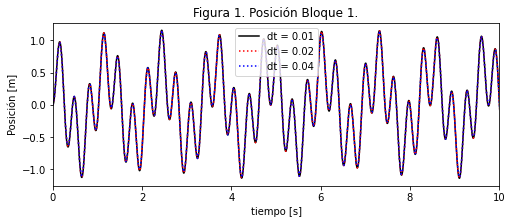

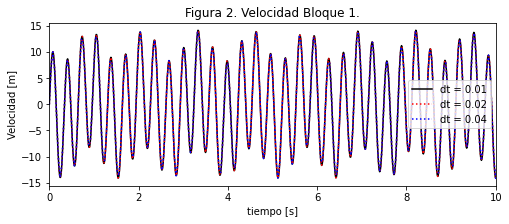

In [15]:
# @title <h3><b> Gráficas del Bloque 1 </b></h3>
time_din, x1_din, v1_din, F1_din, x2_din, v2_din, F2_din = amortiguador_dinamico()
# Gráfica de posición
plt.figure(figsize=(8, 3))
plt.plot(time1, P1[:,0], '-k', label = "dt = 0.01")
plt.plot(time2, P2[:,0], ':r', label = "dt = 0.02")
plt.plot(time3, P3[:,0], ':b', label = "dt = 0.04")
#plt.plot(time_din, x1_din, '-b', label = "PyBullet Dinamico")
plt.xlabel("tiempo [s]")
plt.ylabel("Posición [m]" )
plt.title("Figura 1. Posición Bloque 1.")
plt.xlim([0,10])
plt.legend()

# Gráfica de velocidad
plt.figure(figsize=(8, 3))
plt.plot(time1, P1[:,1], '-k', label = "dt = 0.01")
plt.plot(time2, P2[:,1], ':r', label = "dt = 0.02")
plt.plot(time3, P3[:,1], ':b', label = "dt = 0.04")
plt.xlabel("tiempo [s]")
plt.ylabel("Velocidad [m]")
plt.title("Figura 2. Velocidad Bloque 1.")
plt.xlim([0,10])
plt.legend()
plt.show()




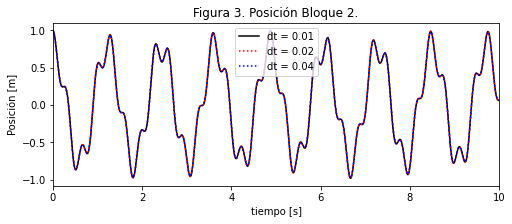

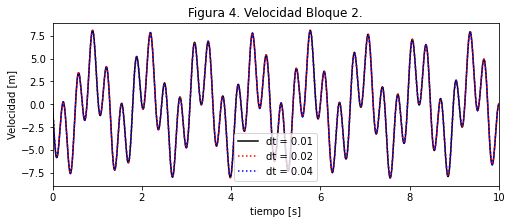

In [16]:
# @title <h3><b> Gráficas del Bloque 2 </b></h3>

# Gráfica de posición
plt.figure(figsize=(8, 3))
plt.plot(time1, P1[:,2], '-k', label = "dt = 0.01")
plt.plot(time2, P2[:,2], ':r', label = "dt = 0.02")
plt.plot(time3, P3[:,2], ':b', label = "dt = 0.04")
plt.xlabel("tiempo [s]")
plt.ylabel("Posición [m]")
plt.title("Figura 3. Posición Bloque 2.")
plt.xlim([0,10])
plt.legend()

# Gráfica de velocidad
plt.figure(figsize=(8, 3))
plt.plot(time1, P1[:,3], '-k', label = "dt = 0.01")
plt.plot(time2, P2[:,3], ':r', label = "dt = 0.02")
plt.plot(time3, P3[:,3], ':b', label = "dt = 0.04")
plt.xlabel("tiempo [s]")
plt.ylabel("Velocidad [m]")
plt.title("Figura 4. Velocidad Bloque 2.")
plt.xlim([0,10])
plt.legend()
plt.show()